<a href="https://colab.research.google.com/github/Grecia329/EcuacionesDiferencialesParciales-/blob/main/Copia_de_OC_Sim2_2026_KS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#datos = np.array([0.10, 0.18, 0.22, 0.35, 0.51, 0.63, 0.80, 0.92])
#datos = np.array([0.12, 0.22, 0.33, 0.45, 0.49, 0.55, 0.67, 0.78, 0.81, 0.91])

import io
import pandas as pd
data = pd.read_csv(io.StringIO('''
98
48
23
87
87
5
32
15
10
38
27
91
10
85
77
93
57
45
29
82
69
80
77
54
'''), header=None)

datos = data.values.flatten()/100
print(datos)


[0.98 0.48 0.23 0.87 0.87 0.05 0.32 0.15 0.1  0.38 0.27 0.91 0.1  0.85
 0.77 0.93 0.57 0.45 0.29 0.82 0.69 0.8  0.77 0.54]


[0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
 0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
 0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
 0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
 1.        ]


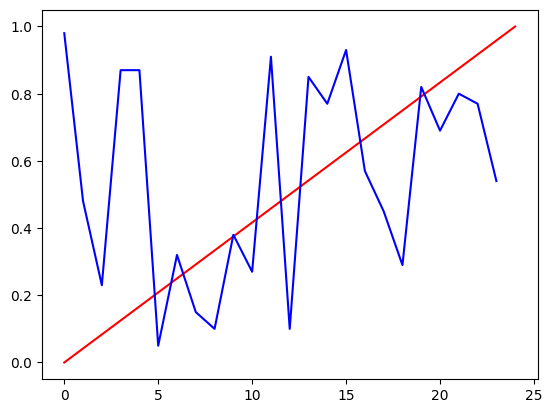

In [ ]:
#np.random.shuffle(datos)
t = np.linspace(0, 1, len(datos)+1)
print(t)
plt.plot(t,'r')
plt.plot(datos,'b')


In [ ]:
DM = np.zeros(len(datos))
for i in range(len(datos)):
  DM[i] = t[i+1]-datos[i]
print(DM)
print(np.max(DM))

[-0.93833333 -0.39666667 -0.105      -0.70333333 -0.66166667  0.2
 -0.02833333  0.18333333  0.275       0.03666667  0.18833333 -0.41
  0.44166667 -0.26666667 -0.145      -0.26333333  0.13833333  0.3
  0.50166667  0.01333333  0.185       0.11666667  0.18833333  0.46      ]
0.5016666666666667


In [ ]:
Dm = np.zeros(len(datos))
for i in range(len(datos)):
  Dm[i] = datos[i] - t[i]
print(Dm)
print(np.max(Dm))

[ 0.98        0.43833333  0.14666667  0.745       0.70333333 -0.15833333
  0.07       -0.14166667 -0.23333333  0.005      -0.14666667  0.45166667
 -0.4         0.30833333  0.18666667  0.305      -0.09666667 -0.25833333
 -0.46        0.02833333 -0.14333333 -0.075      -0.14666667 -0.41833333]
0.98


In [ ]:
print( max( np.max(DM), np.max(Dm) ) )

0.98


In [ ]:
from scipy . stats import kstest
stat , p = kstest (datos, 'uniform')
print ("KS statistic :", stat )
print ("p- value :", p)

KS statistic : 0.18666666666666665
p- value : 0.33089919848042015


In [ ]:
import numpy as np
from scipy.stats import norm
#datos = np.random.uniform (0 ,1 ,5000)

#datos = np.array([0.8, 0.6, 0.2, 0.1, 0.7, 0.9])

media = 0.5
signos = datos > media
R = 1 + np.sum( signos [1:] != signos [: -1])
n1 = np. sum( signos )
n2 = len( datos ) - n1
ER = (2*n1*n2)/ len( datos ) + 1
VarR = (2*n1*n2 *(2* n1*n2 -len ( datos ))) / ( len( datos ) **2*( len( datos ) -1) )
Z = (R - ER)/np. sqrt ( VarR )
p = 2*(1 - norm .cdf(abs(Z)))

print(ER)
print(VarR)
print(Z)
print(p)

12.916666666666666
5.656099033816425
-1.6468654155390234
0.09958571190907284


In [ ]:
import numpy as np
from scipy.stats import chisquare
# Dividir en 10 intervalos
observed , _ = np. histogram (datos , bins =10)
expected = [len( datos ) /10]*10
stat , p = chisquare ( observed , expected )
print ("Chi - square :", stat )
print ("p- value :", p)

Chi - square : 5.166666666666666
p- value : 0.8195441405915816


In [ ]:
import numpy as np
from scipy.stats import norm

datos = np.random.uniform (0 ,1 ,5000)


media = 0.5
signos = datos > media
R = 1 + np.sum( signos [1:] != signos [: -1])
n1 = np. sum( signos )
n2 = len( datos ) - n1
ER = (2*n1*n2)/ len( datos ) + 1
VarR = (2*n1*n2 *(2* n1*n2 -len ( datos ))) / ( len( datos ) **2*( len( datos ) -1) )
Z = (R - ER)/np. sqrt ( VarR )
p = 2*(1 - norm .cdf(abs(Z)))

print(ER)
print(VarR)
print(Z)
print(p)

2500.8556
1249.6055541611042
-1.0991757696899063
0.27169140543515535


/tmp/ipython-input-4234103828.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(valores, hist=True, kde=True)


3.4872


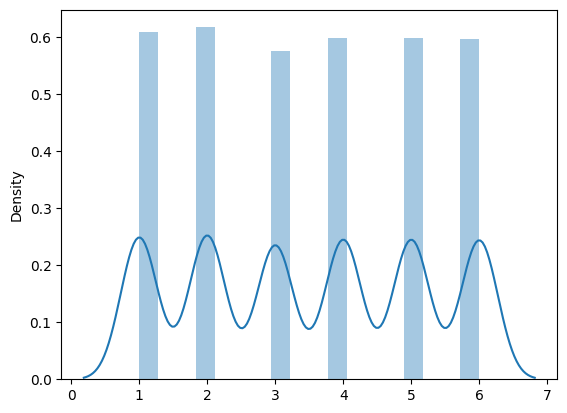

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def dado(u):
  if u < 1/6:
    return 1
  elif u < 2/6:
    return 2
  elif u < 3/6:
    return 3
  elif u < 4/6:
    return 4
  elif u < 5/6:
    return 5
  else:
    return 6


n = 10**4
valores = np.zeros(n)
for i in range(n):
  u = np.random.random()
  valores[i] = dado(u)

sns.distplot(valores, hist=True, kde=True)
print(np.mean(valores))